## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 222us/step - loss: 2.0585 - acc: 0.2594 - val_loss: 2.0510 - val_acc: 0.2484
Epoch 2/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.8764 - acc: 0.3347 - val_loss: 1.9135 - val_acc: 0.3108
Epoch 3/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.8094 - acc: 0.3602 - val_loss: 1.8713 - val_acc: 0.3363
Epoch 4/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.7608 - acc: 0.3790 - val_loss: 1.8768 - val_acc: 0.3422
Epoch 5/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.7283 - acc: 0.3889 - val_loss: 1.7128 - val_acc: 0.4060
Epoch 6/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6919 - acc: 0.4049 - val_loss: 1.6685 - val_acc: 0.4163
Epoch 7/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.6661 - acc: 0.4150 - val_loss: 1

50000/50000 [==============================] - 7s 135us/step - loss: 1.1703 - acc: 0.5910 - val_loss: 1.3848 - val_acc: 0.5063
Epoch 60/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.1746 - acc: 0.5886 - val_loss: 1.3766 - val_acc: 0.5129
Epoch 61/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.1605 - acc: 0.5931 - val_loss: 1.4230 - val_acc: 0.4965
Epoch 62/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1572 - acc: 0.5957 - val_loss: 1.4882 - val_acc: 0.4728
Epoch 63/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.1459 - acc: 0.6001 - val_loss: 1.4508 - val_acc: 0.4942
Epoch 64/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.1450 - acc: 0.5994 - val_loss: 1.4179 - val_acc: 0.4961
Epoch 65/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1362 - acc: 0.6001 - val_loss: 1.5015 - val_acc: 0.4815
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 137us/step - loss: 0.8626 - acc: 0.7004 - val_loss: 1.5725 - val_acc: 0.4905
Epoch 118/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.8566 - acc: 0.7039 - val_loss: 1.6338 - val_acc: 0.4824
Epoch 119/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.8521 - acc: 0.7020 - val_loss: 1.5699 - val_acc: 0.4911
Epoch 120/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.8416 - acc: 0.7095 - val_loss: 1.4057 - val_acc: 0.5286
Epoch 121/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.8363 - acc: 0.7111 - val_loss: 1.4665 - val_acc: 0.5071
Epoch 122/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.8402 - acc: 0.7106 - val_loss: 1.4674 - val_acc: 0.5191
Epoch 123/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.8257 - acc: 0.7126 - val_loss: 1.5349 - val_acc: 0.4913
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 6s 126us/step - loss: 0.5750 - acc: 0.8066 - val_loss: 1.8633 - val_acc: 0.4796
Epoch 176/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.5570 - acc: 0.8116 - val_loss: 1.7356 - val_acc: 0.4938
Epoch 177/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.5795 - acc: 0.8056 - val_loss: 1.6555 - val_acc: 0.5140
Epoch 178/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.5564 - acc: 0.8131 - val_loss: 1.5499 - val_acc: 0.5336
Epoch 179/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.5544 - acc: 0.8123 - val_loss: 1.6569 - val_acc: 0.5207
Epoch 180/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.5576 - acc: 0.8121 - val_loss: 1.5553 - val_acc: 0.5457
Epoch 181/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.5453 - acc: 0.8163 - val_loss: 1.7608 - val_acc: 0.5004
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 3s 53us/step - loss: 0.3416 - acc: 0.8931 - val_loss: 2.2599 - val_acc: 0.4915
Epoch 234/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.3439 - acc: 0.8957 - val_loss: 1.9403 - val_acc: 0.5291
Epoch 235/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.3080 - acc: 0.9054 - val_loss: 1.9030 - val_acc: 0.5332
Epoch 236/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.2992 - acc: 0.9063 - val_loss: 2.2199 - val_acc: 0.4854
Epoch 237/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.3092 - acc: 0.9039 - val_loss: 1.9328 - val_acc: 0.5249
Epoch 238/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.3018 - acc: 0.9096 - val_loss: 1.9034 - val_acc: 0.5291
Epoch 239/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2922 - acc: 0.9089 - val_loss: 1.9201 - val_acc: 0.5273
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.1865 - acc: 0.9556 - val_loss: 3.2580 - val_acc: 0.4741
Epoch 292/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2150 - acc: 0.9446 - val_loss: 2.1680 - val_acc: 0.5414
Epoch 293/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0945 - acc: 0.9822 - val_loss: 2.3071 - val_acc: 0.5303
Epoch 294/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1707 - acc: 0.9601 - val_loss: 2.2514 - val_acc: 0.5349
Epoch 295/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.1849 - acc: 0.9549 - val_loss: 2.1610 - val_acc: 0.5395
Epoch 296/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.3486 - acc: 0.9234 - val_loss: 2.8026 - val_acc: 0.4781
Epoch 297/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.1769 - acc: 0.9537 - val_loss: 2.2794 - val_acc: 0.5372
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 3s 57us/step - loss: 0.0348 - acc: 0.9969 - val_loss: 2.5407 - val_acc: 0.5425
Epoch 350/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0328 - acc: 0.9976 - val_loss: 2.5387 - val_acc: 0.5482
Epoch 351/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0345 - acc: 0.9965 - val_loss: 2.5454 - val_acc: 0.5457
Epoch 352/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0317 - acc: 0.9975 - val_loss: 2.5720 - val_acc: 0.5441
Epoch 353/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0312 - acc: 0.9978 - val_loss: 2.5711 - val_acc: 0.5439
Epoch 354/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0298 - acc: 0.9979 - val_loss: 2.5849 - val_acc: 0.5422
Epoch 355/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.0298 - acc: 0.9979 - val_loss: 2.5998 - val_acc: 0.5431
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 0.0123 - acc: 0.9997 - val_loss: 2.8801 - val_acc: 0.5444
Epoch 408/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0121 - acc: 0.9997 - val_loss: 2.9001 - val_acc: 0.5458
Epoch 409/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0122 - acc: 0.9997 - val_loss: 2.8873 - val_acc: 0.5427
Epoch 410/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0119 - acc: 0.9997 - val_loss: 2.8936 - val_acc: 0.5414
Epoch 411/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0119 - acc: 0.9997 - val_loss: 2.8977 - val_acc: 0.5460
Epoch 412/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0117 - acc: 0.9997 - val_loss: 2.8955 - val_acc: 0.5454
Epoch 413/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0113 - acc: 0.9998 - val_loss: 2.9044 - val_acc: 0.5435
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 3s 52us/step - loss: 0.0095 - acc: 0.9999 - val_loss: 2.9345 - val_acc: 0.5460
Epoch 466/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0093 - acc: 0.9999 - val_loss: 2.9440 - val_acc: 0.5442
Epoch 467/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0091 - acc: 0.9999 - val_loss: 2.9485 - val_acc: 0.5431
Epoch 468/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0092 - acc: 0.9999 - val_loss: 2.9572 - val_acc: 0.5437
Epoch 469/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0089 - acc: 0.9999 - val_loss: 2.9572 - val_acc: 0.5447
Epoch 470/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 2.9587 - val_acc: 0.5441
Epoch 471/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0086 - acc: 0.9999 - val_loss: 2.9691 - val_acc: 0.5448
Epoch 472/500
50000/50000 [=======

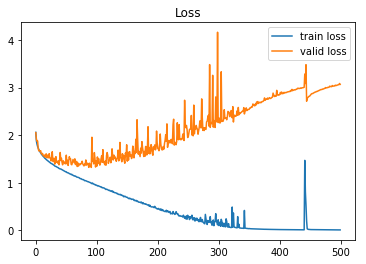

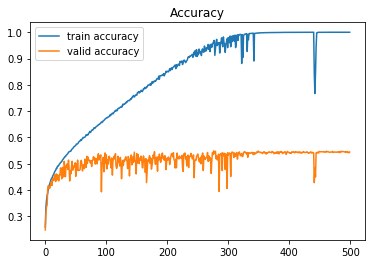

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()